In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/5.outlier.csv",header=None)

In [3]:
data.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [4]:
data[[0,1]]

,0,1
0,-17.897000,7.662423
1,-26.343161,-3.055257
2,-19.059771,-8.531838
3,-16.383898,-2.352667
4,-12.926541,9.074994
...,...,...
595,4.782462,-29.002590
596,3.990671,-27.664533
597,1.968937,-27.666538
598,0.397395,-28.864856


D:\data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

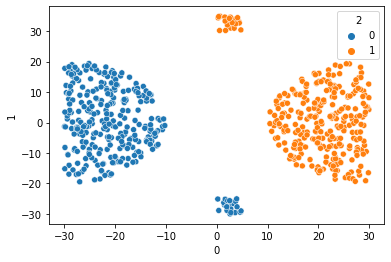

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [7]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [9]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

In [26]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))

model.add(Dense(2,activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 15        
                                                                 
 dense_9 (Dense)             (None, 2)                 12        
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9167 - val_loss: 0.1538 - val_accuracy: 1.0000
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.9074 - val_loss: 0.1511 - val_accuracy: 1.0000
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9051 - val_loss: 0.1492 - val_accuracy: 1.0000
Epoch 4/50
44/44 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.9190 - val_loss: 0.1465 - val_accuracy: 1.0000
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9005 - val_loss: 0.1448 - val_accuracy: 1.0000
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8773 - val_loss: 0.1434 - val_accuracy: 1.0000
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9097 - val_loss: 0.1414 - val_accuracy: 1.0000
Epoch 8/50
44/44 [==

In [31]:
y_cap=model.predict(x_testf)

In [32]:
y_capf=np.where(y_cap>0.5,1,0)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

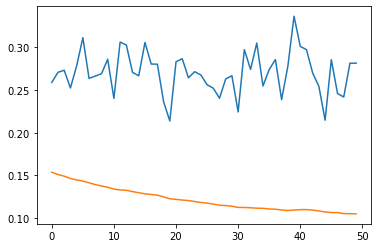

In [34]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [35]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

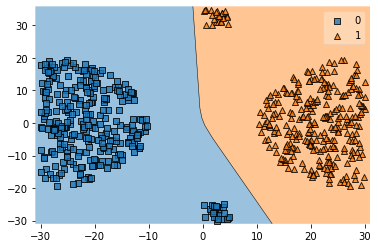

In [36]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

In [37]:
y_capf

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

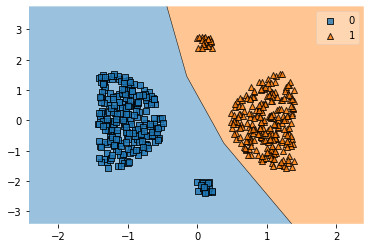

In [38]:
plot_decision_regions(x_trainf,y_train.values.astype(int),clf=model);

<AxesSubplot:>

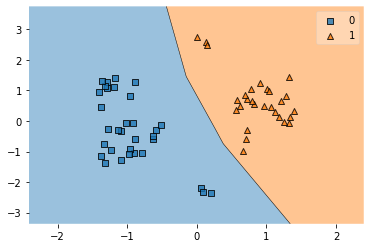

In [39]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

In [22]:
x_testf[[0,1]]

array([[-1.17075732,  1.39421812],
       [-0.90691349, -1.04884356]])

In [23]:
y_test

13     0
113    0
107    0
66     0
369    1
437    1
580    0
293    1
8      0
273    0
7      0
332    1
479    1
275    0
169    0
253    0
234    0
289    1
159    0
17     0
572    1
49     0
59     0
309    1
158    0
476    1
457    1
256    0
233    0
167    0
520    1
78     0
484    1
571    1
406    1
463    1
538    1
589    0
482    1
56     0
342    1
445    1
456    1
557    1
110    0
594    0
527    1
381    1
265    0
380    1
230    0
529    1
514    1
133    0
126    0
60     0
432    1
122    0
269    0
485    1
Name: 2, dtype: int64

In [24]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))
model.add(Dense(2,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(2,activation="relu"))

model.add(Dense(1,activation="sigmoid"))